In [1]:
import seaborn as sns
import wandb
import pandas as pd
import matplotlib.pyplot as plt


---
## Init wandb

In [2]:
api = wandb.Api()

In [3]:
entity, project= "ece517", "bipedal-walker"
runs = api.runs(f'{entity}/{project}')

In [4]:
summary_list, config_list, name_list = [], [], []
run_data_df_list = []

for run in runs:
    group = run.group
    summary_list.append(run.summary._json_dict)

    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})
    run_data_df = run.history()
    run_data_df['group'] = group
    for k,v in config_list[-1].items():
        if type(v) != dict:
            run_data_df[k] = v
    run_data_df_list.append(run_data_df)

    name_list.append(run.name)


In [5]:
runs_df = pd.concat(run_data_df_list)
runs_df = runs_df.replace({
    'group': {
        'ppo_ex': 'PPO',
        'ppo_3': 'GPT2PPO'

    }
})
runs_df['model'] = runs_df['group']
runs_df = runs_df.drop(columns=['group'])

---
# plot helper

In [6]:
def plot_data(df, var, title=None, y_log_scale=False, hue='model', errorbar=('ci', 95)):
    sns.set_theme(style="whitegrid")
    sns.set_context("paper")
    plot = sns.lineplot(x="epoch", y=var,
                        hue=hue,
                        data=df, palette='Set1', errorbar=errorbar)
    if title is not None:
        plot.set(title=title)
    if y_log_scale:
        plot.set_yscale("log")
    plt.tight_layout()
    plt.savefig(f'{project}-{var}-{hue}.png')

---
# Lunar Lander Plots

In [38]:
# model_df = runs_df[runs_df['model'] == 'PPO' | runs_df['model'] == 'GPT2PPO']
model_df = runs_df.loc[(runs_df.model == "PPO") | (runs_df.model == "GPT2PPO")]
ctx_len_df =  runs_df.loc[(runs_df.model == "GPT2PPO")]
model_df

,trainer/global_step,avg_ep_len,avg_reward,_step,loss_actor,_runtime,loss_critic,epoch,avg_ep_reward,_timestamp,...,ctx_len,lr_actor,lr_critic,batch_size,clip_ratio,hidden_size,nb_optim_iters,max_episode_len,steps_per_epoch,model
0,15,5.982143,-0.127684,0,-0.000375,9.077104,13992.165669,0,-12.477571,1.670898e+09,...,25.0,0.0003,0.001,128,0.2,64.0,5,500,2048,GPT2PPO
1,31,95.938240,-2.022589,1,-0.001089,14.471684,7494.134956,1,-198.072149,1.670898e+09,...,25.0,0.0003,0.001,128,0.2,64.0,5,500,2048,GPT2PPO
2,47,99.120422,-1.727984,2,-0.001874,19.701898,5528.483887,2,-175.075006,1.670898e+09,...,25.0,0.0003,0.001,128,0.2,64.0,5,500,2048,GPT2PPO
3,63,95.550308,-1.867452,3,-0.000083,24.877493,2328.653029,3,-180.132398,1.670898e+09,...,25.0,0.0003,0.001,128,0.2,64.0,5,500,2048,GPT2PPO
4,79,83.110474,-1.581225,4,-0.002493,30.124520,3836.353655,4,-136.750799,1.670898e+09,...,25.0,0.0003,0.001,128,0.2,64.0,5,500,2048,GPT2PPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2335,500.000000,-0.040548,145,-0.002442,592.546084,139.423276,145,-20.171746,1.670892e+09,...,NaN,0.0003,0.001,128,0.2,NaN,5,500,2048,PPO
146,2351,500.000000,-0.010747,146,0.001410,596.788468,137.863060,146,-7.165753,1.670892e+09,...,NaN,0.0003,0.001,128,0.2,NaN,5,500,2048,PPO
147,2367,500.000000,0.010147,147,-0.001042,601.137968,99.520577,147,-4.864701,1.670892e+09,...,NaN,0.0003,0.001,128,0.2,NaN,5,500,2048,PPO
148,2383,500.000000,-0.060909,148,-0.001256,605.479405,103.135543,148,-30.040935,1.670892e+09,...,NaN,0.0003,0.001,128,0.2,NaN,5,500,2048,PPO


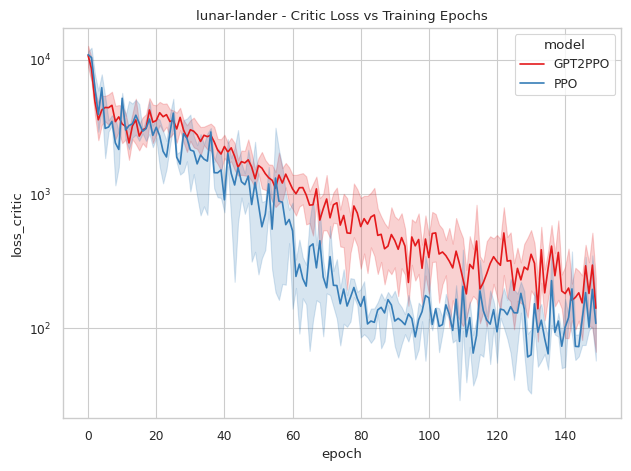

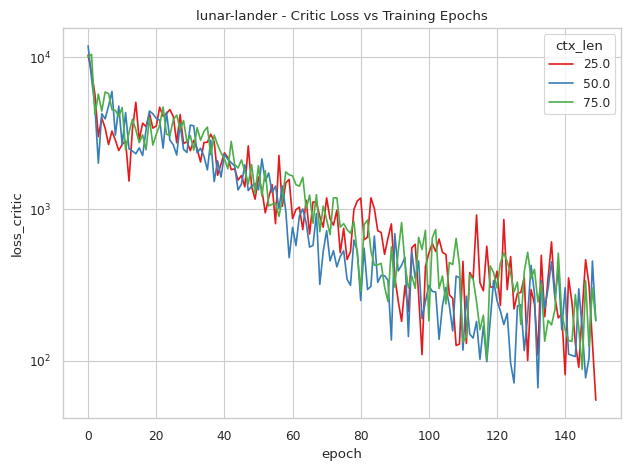

In [39]:
plot_data(model_df, 'loss_critic', title=f"{project} - Critic Loss vs Training Epochs", y_log_scale=True)
plt.show()
plot_data(ctx_len_df, 'loss_critic', title=f"{project} - Critic Loss vs Training Epochs", y_log_scale=True, hue='ctx_len', errorbar=None)
plt.show()


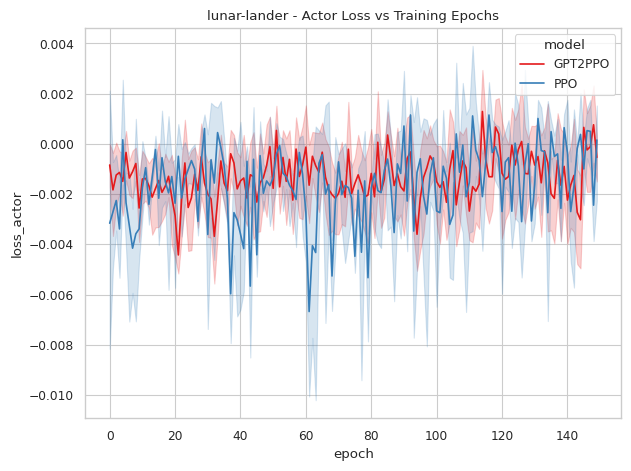

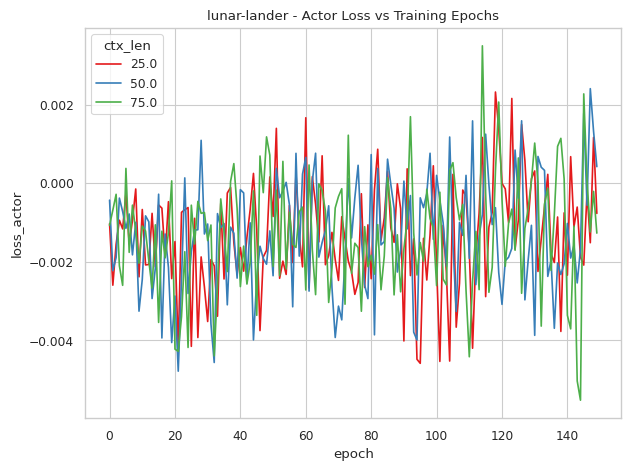

In [40]:
plot_data(model_df, 'loss_actor', title=f"{project} - Actor Loss vs Training Epochs")
plt.show()
plot_data(ctx_len_df, 'loss_actor', title=f"{project} - Actor Loss vs Training Epochs", hue='ctx_len', errorbar=None)
plt.show()

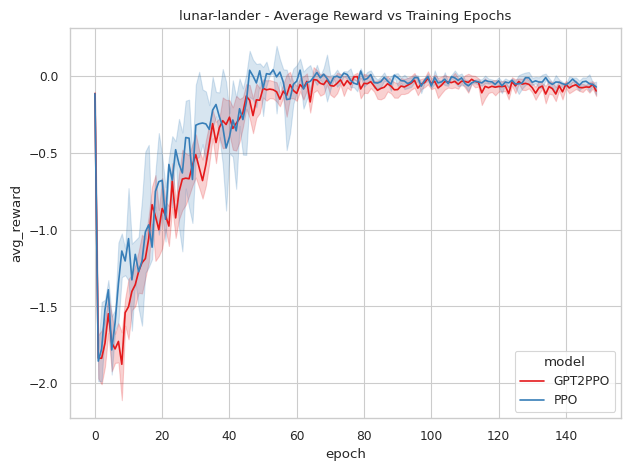

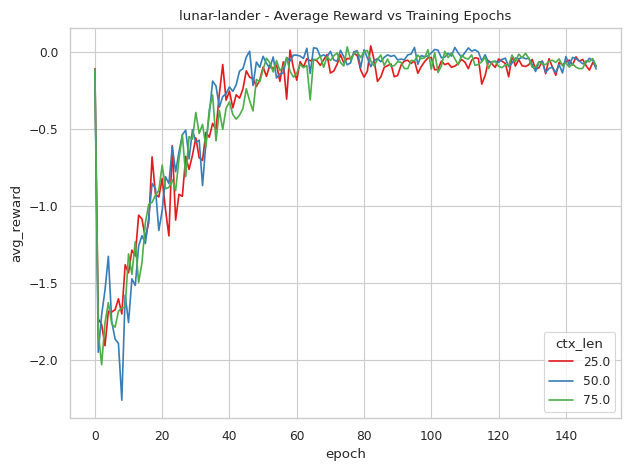

In [41]:
plot_data(model_df, 'avg_reward', title=f"{project} - Average Reward vs Training Epochs")
plt.show()
plot_data(ctx_len_df, 'avg_reward', title=f"{project} - Average Reward vs Training Epochs", hue='ctx_len', errorbar=None)
plt.show()


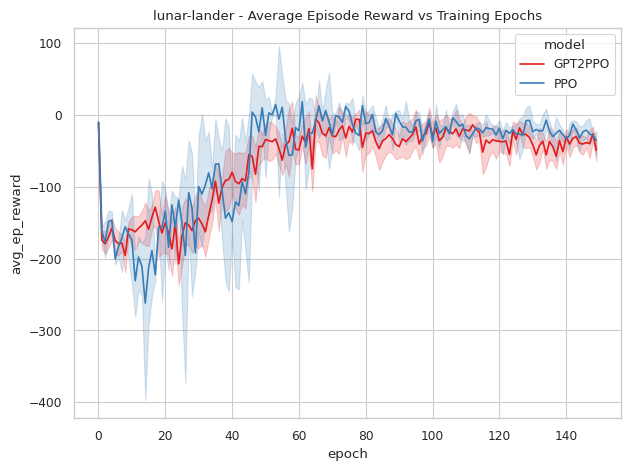

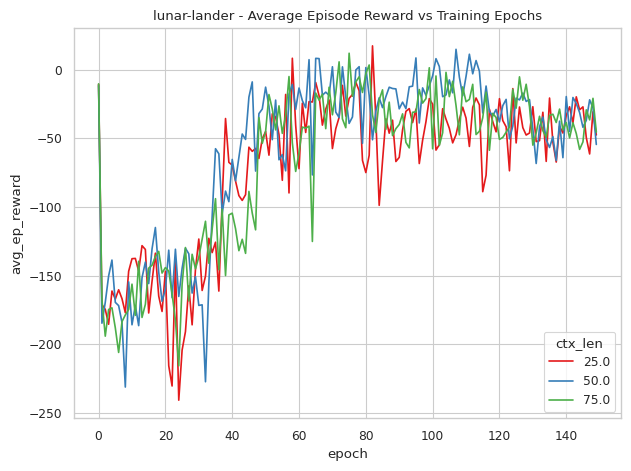

In [42]:
plot_data(model_df, 'avg_ep_reward', title=f"{project} - Average Episode Reward vs Training Epochs")
plt.show()
plot_data(ctx_len_df, 'avg_ep_reward', title=f"{project} - Average Episode Reward vs Training Epochs", hue='ctx_len', errorbar=None)
plt.show()

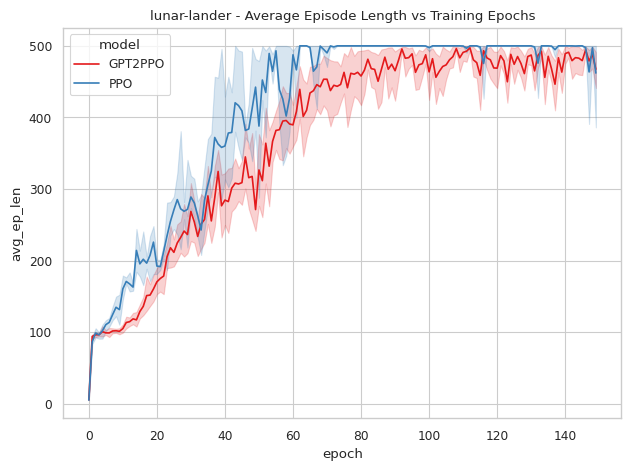

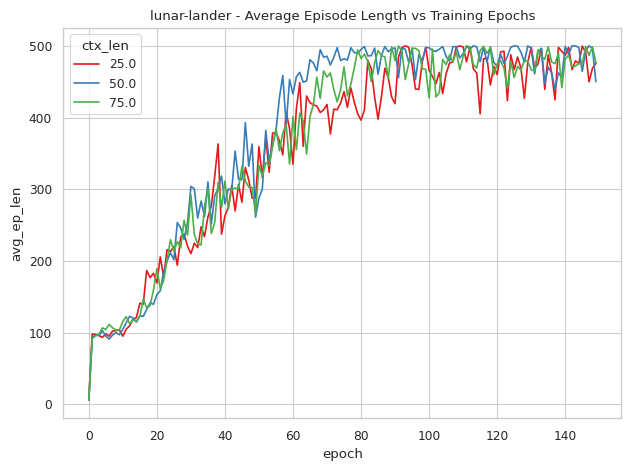

In [43]:
plot_data(model_df, 'avg_ep_len', title=f"{project} - Average Episode Length vs Training Epochs")
plt.show()
plot_data(ctx_len_df, 'avg_ep_len', title=f"{project} - Average Episode Length vs Training Epochs", hue='ctx_len', errorbar=None)
plt.show()

---
# Acrobot plots

In [8]:
model_df = runs_df.loc[(runs_df.model == "PPO") | (runs_df.model == "GPT2PPO")]


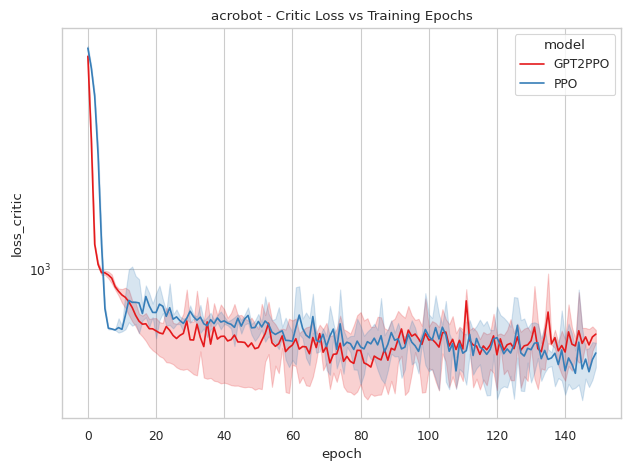

In [9]:
plot_data(model_df, 'loss_critic', title=f"{project} - Critic Loss vs Training Epochs", y_log_scale=True)
plt.show()

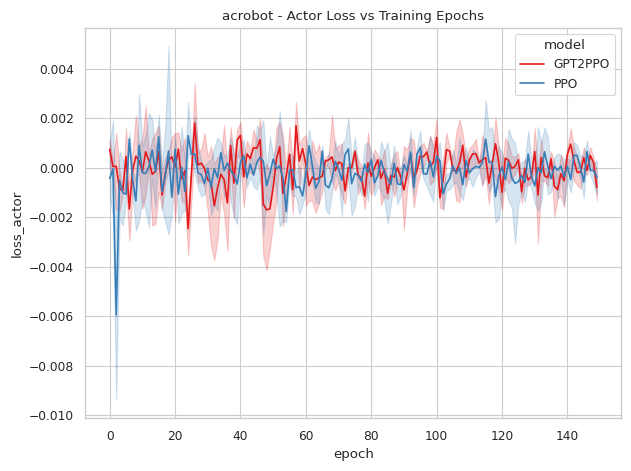

In [10]:
plot_data(model_df, 'loss_actor', title=f"{project} - Actor Loss vs Training Epochs")
plt.show()

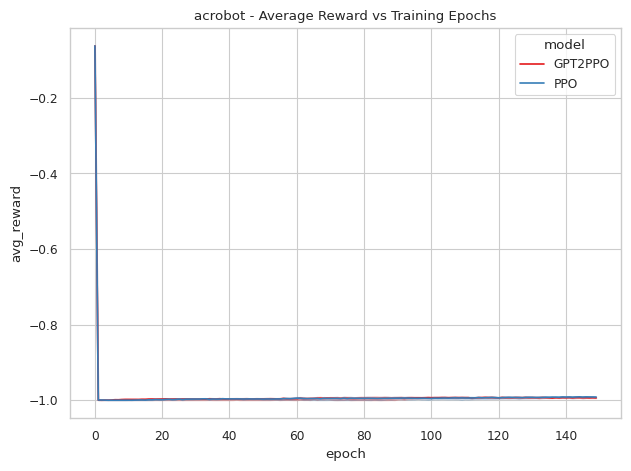

In [11]:
plot_data(model_df, 'avg_reward', title=f"{project} - Average Reward vs Training Epochs")
plt.show()

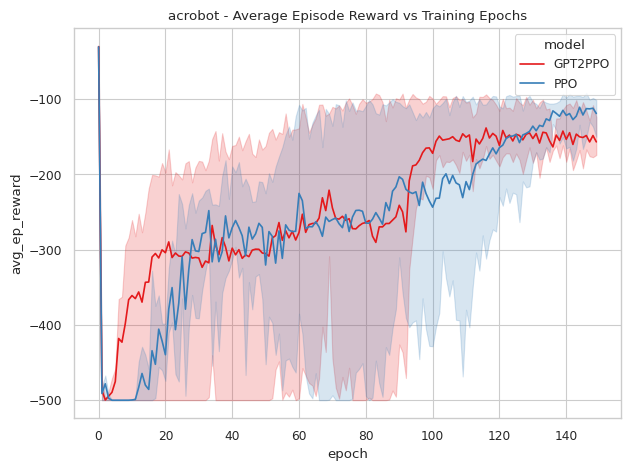

In [12]:
plot_data(model_df, 'avg_ep_reward', title=f"{project} - Average Episode Reward vs Training Epochs")
plt.show()

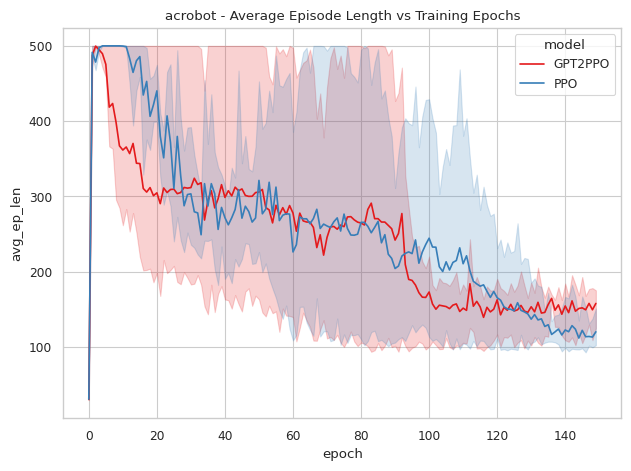

In [13]:
plot_data(model_df, 'avg_ep_len', title=f"{project} - Average Episode Length vs Training Epochs")
plt.show()

---
# Bipedal Walker Plots

In [7]:
model_df = runs_df.loc[(runs_df.model == "PPO") | (runs_df.model == "GPT2PPO")]
model_df

,trainer/global_step,avg_ep_len,avg_reward,_step,loss_actor,_runtime,loss_critic,epoch,avg_ep_reward,_timestamp,...,ctx_len,lr_actor,lr_critic,batch_size,clip_ratio,hidden_size,nb_optim_iters,max_episode_len,steps_per_epoch,model
0,15.0,13.736113,-0.021483,0.0,3.806643,9.859922,1157.083390,0.0,-4.873750,1.670955e+09,...,50.0,0.0003,0.001,128.0,0.2,64.0,5.0,500.0,2048.0,GPT2PPO
1,31.0,214.286987,-0.365410,1.0,3.784375,16.496999,2006.741835,1.0,-79.389122,1.670955e+09,...,50.0,0.0003,0.001,128.0,0.2,64.0,5.0,500.0,2048.0,GPT2PPO
2,47.0,129.654892,-0.722901,2.0,1.691316,23.061600,1191.883158,2.0,-101.910093,1.670955e+09,...,50.0,0.0003,0.001,128.0,0.2,64.0,5.0,500.0,2048.0,GPT2PPO
3,63.0,96.110901,-1.204339,3.0,2.124953,29.720439,660.554924,3.0,-122.816956,1.670955e+09,...,50.0,0.0003,0.001,128.0,0.2,64.0,5.0,500.0,2048.0,GPT2PPO
4,79.0,106.368454,-1.154531,4.0,1.438848,36.526495,488.071135,4.0,-125.431417,1.670955e+09,...,50.0,0.0003,0.001,128.0,0.2,64.0,5.0,500.0,2048.0,GPT2PPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2335.0,354.312866,-0.139091,145.0,0.002478,323.240319,7.888493,145.0,-54.898544,1.670900e+09,...,NaN,0.0003,0.001,128.0,0.2,NaN,5.0,500.0,2048.0,PPO
146,2351.0,500.000000,-0.034734,146.0,0.002652,324.569621,3.409637,146.0,-17.218452,1.670900e+09,...,NaN,0.0003,0.001,128.0,0.2,NaN,5.0,500.0,2048.0,PPO
147,2367.0,500.000000,-0.030437,147.0,0.001837,325.873734,1.686823,147.0,-15.641469,1.670900e+09,...,NaN,0.0003,0.001,128.0,0.2,NaN,5.0,500.0,2048.0,PPO
148,2383.0,500.000000,-0.034223,148.0,0.005986,327.157820,7.604920,148.0,-16.986278,1.670900e+09,...,NaN,0.0003,0.001,128.0,0.2,NaN,5.0,500.0,2048.0,PPO


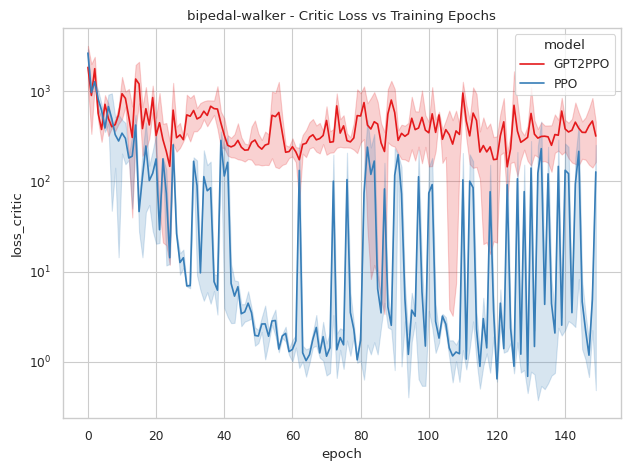

In [8]:
plot_data(model_df, 'loss_critic', title=f"{project} - Critic Loss vs Training Epochs", y_log_scale=True)
plt.show()

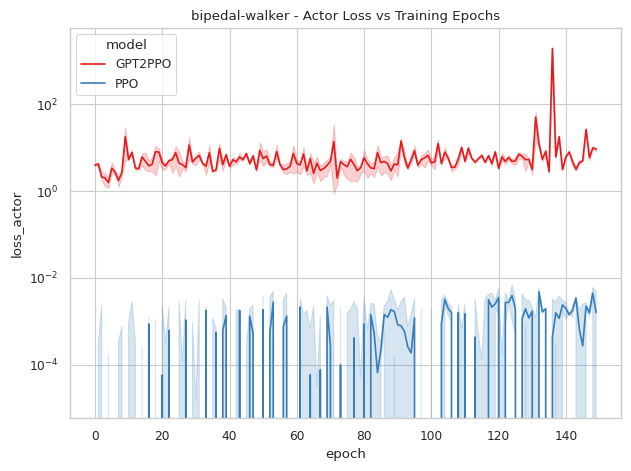

In [12]:
plot_data(model_df, 'loss_actor', title=f"{project} - Actor Loss vs Training Epochs", y_log_scale=True)
plt.show()

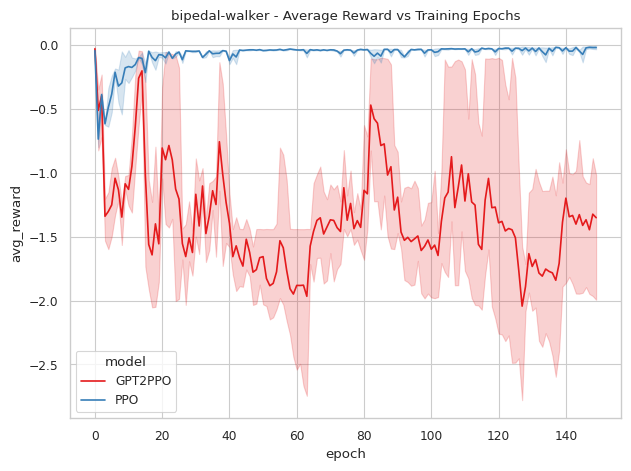

In [13]:
plot_data(model_df, 'avg_reward', title=f"{project} - Average Reward vs Training Epochs")
plt.show()

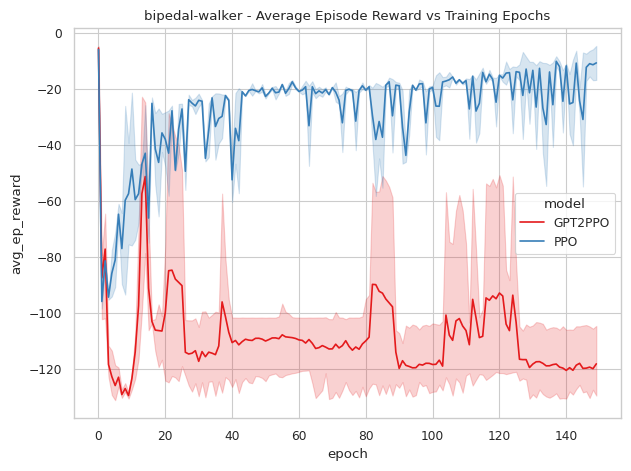

In [14]:
plot_data(model_df, 'avg_ep_reward', title=f"{project} - Average Episode Reward vs Training Epochs")
plt.show()

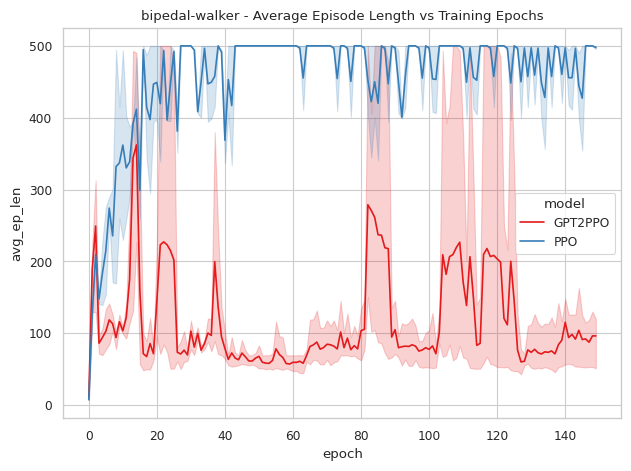

In [15]:
plot_data(model_df, 'avg_ep_len', title=f"{project} - Average Episode Length vs Training Epochs")
plt.show()